<a href="https://colab.research.google.com/github/Syafunn/repo3/blob/main/percobaan4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# Upload file ZIP dari komputer lokal
uploaded = files.upload()


Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [3]:
import os

os.makedirs("data/asl_data", exist_ok=True)

In [4]:

!mkdir -p data/asl_data



In [5]:
import shutil

shutil.move("sign_mnist_train.csv", "data/asl_data/sign_mnist_train.csv")
shutil.move("sign_mnist_test.csv", "data/asl_data/sign_mnist_valid.csv")

'data/asl_data/sign_mnist_valid.csv'

In [6]:

import tensorflow.keras as keras
import pandas as pd

# Load in our data from CSV files
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate our our image vectors
x_train = train_df.values
x_valid = valid_df.values

num_classes = y_train.max() + 1  # Otomatis jumlah kelas (maks label + 1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)


# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

# Reshape the image data for the convolutional network
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [7]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)


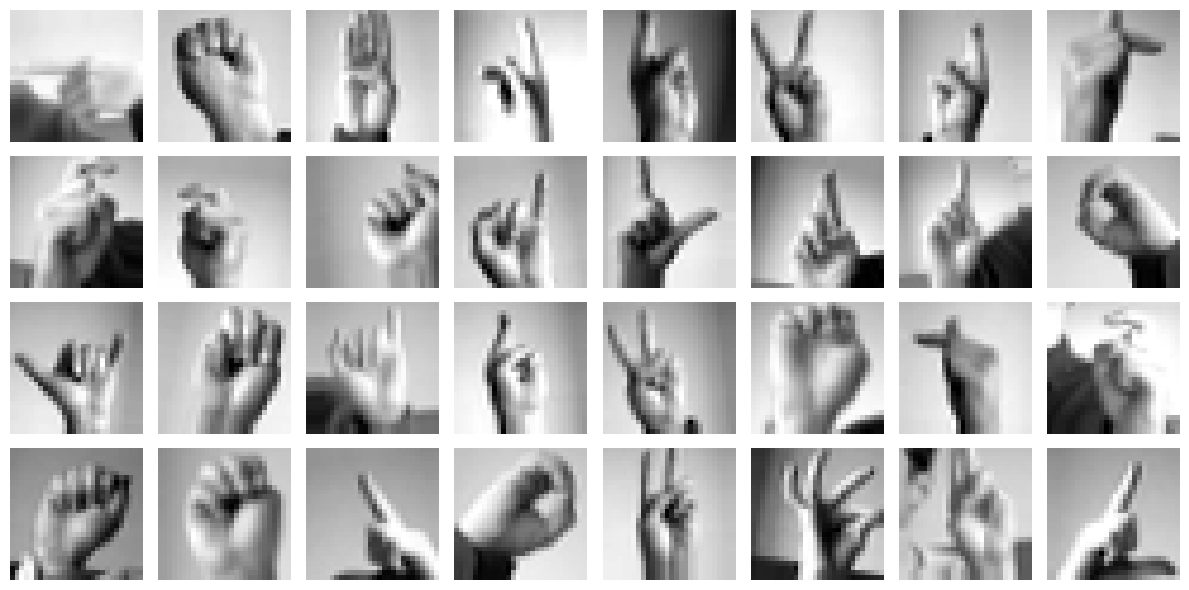

In [9]:

import matplotlib.pyplot as plt
import numpy as np

batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

# Gunakan fungsi next() bawaan Python
x, y = next(img_iter)

fig, ax = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image), cmap='gray')
    ax.flatten()[i].axis('off')
plt.tight_layout()
plt.show()


In [10]:

datagen.fit(x_train)

In [11]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:

model.fit(
    img_iter,
    epochs=10,
    steps_per_epoch=len(x_train) // batch_size,
    validation_data=(x_valid, y_valid)
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


857/857 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.4575 - loss: 1.8007 - val_accuracy: 0.8611 - val_loss: 0.4087
Epoch 2/10
  1/857 ━━━━━━━━━━━━━━━━━━━━ 1:29 105ms/step - accuracy: 0.7188 - loss: 0.7593

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


857/857 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7188 - loss: 0.7593 - val_accuracy: 0.5699 - val_loss: 1.7160
Epoch 3/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 79s 92ms/step - accuracy: 0.8716 - loss: 0.3787 - val_accuracy: 0.7833 - val_loss: 0.7213
Epoch 4/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9062 - loss: 0.3004 - val_accuracy: 0.8989 - val_loss: 0.2803
Epoch 5/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 75s 88ms/step - accuracy: 0.9260 - loss: 0.2150 - val_accuracy: 0.9561 - val_loss: 0.1261
Epoch 6/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9062 - loss: 0.3983 - val_accuracy: 0.6767 - val_loss: 1.8315
Epoch 7/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 79s 90ms/step - accuracy: 0.9470 - loss: 0.1638 - val_accuracy: 0.9789 - val_loss: 0.0568
Epoch 8/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9688 - loss: 0.0633 - val_accuracy: 0.9778 - val_loss: 0.0722
Epoch 9/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 136s 90ms/step - accuracy: 0.9567 - loss: 0.1312 - val_accuracy: 0.96

In [13]:

model.save("model_gesture.h5")
print("Model berhasil disimpan sebagai model_gesture.h5")

Model berhasil disimpan sebagai model_gesture.h5


In [14]:

from tensorflow import keras

model = keras.models.load_model('model_gesture.h5')

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 75)     │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 75)     │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 50)     │        33,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 25)       │        11,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 25)       │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 25)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │        12,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,564 (1.01 MB)

 Trainable params: 264,262 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

 Optimizer params: 2 (12.00 B)

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

In [33]:

from google.colab import files

# Upload file ZIP dari komputer lokal
uploaded = files.upload()


Saving A.png to A.png


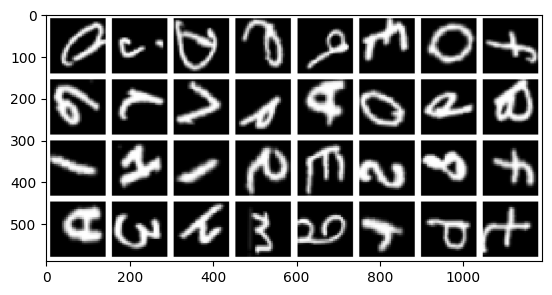

In [34]:
show_image('A.png')

In [35]:

from tensorflow.keras.preprocessing import image as image_utils

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image

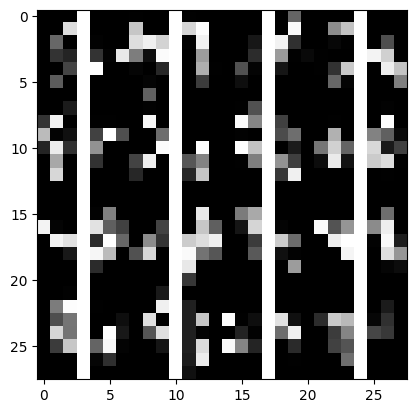

In [36]:

image = load_and_scale_image('A.png')
plt.imshow(image, cmap='gray')

In [37]:
image = image_utils.img_to_array(image)

In [38]:
# This reshape corresponds to 1 image of 28x28 pixels with one color channel
image = image.reshape(1,28,28,1)

In [39]:
image = image / 255


In [40]:

prediction = model.predict(image)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
[[9.9524224e-01 1.0659086e-21 7.5984744e-19 4.1982913e-35 2.2039915e-17
  5.2343156e-12 1.2485392e-27 1.9721212e-17 1.5041047e-24 9.6419043e-18
  1.0691840e-26 0.0000000e+00 2.3961828e-09 8.4791576e-14 1.1432564e-21
  4.7577643e-03 2.1175761e-11 0.0000000e+00 5.3025058e-34 2.6089895e-33
  3.1585946e-29 0.0000000e+00 1.1185146e-17 3.3522060e-19 1.9848832e-25]]


In [41]:
import numpy as np
np.argmax(prediction)

np.int64(0)

In [42]:
# Alphabet does not contain j or z because they require movement
alphabet = "abcdefghiklmnopqrstuvwxy0123456789"
dictionary = {}
for i in range(33):
    dictionary[i] = alphabet[i]
dictionary


{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'k',
 10: 'l',
 11: 'm',
 12: 'n',
 13: 'o',
 14: 'p',
 15: 'q',
 16: 'r',
 17: 's',
 18: 't',
 19: 'u',
 20: 'v',
 21: 'w',
 22: 'x',
 23: 'y',
 24: '0',
 25: '1',
 26: '2',
 27: '3',
 28: '4',
 29: '5',
 30: '6',
 31: '7',
 32: '8'}

In [43]:

dictionary[np.argmax(prediction)]

'a'

In [44]:
print("Keys in dictionary:", dictionary.keys())
print("Predicted label index:", np.argmax(prediction))

Keys in dictionary: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])
Predicted label index: 0


In [45]:
def predict_letter(file_path):
    show_image(file_path)
    image = load_and_scale_image(file_path)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,28,28,1)
    image = image/255
    prediction = model.predict(image)
    # convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    return predicted_letter


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


'a'

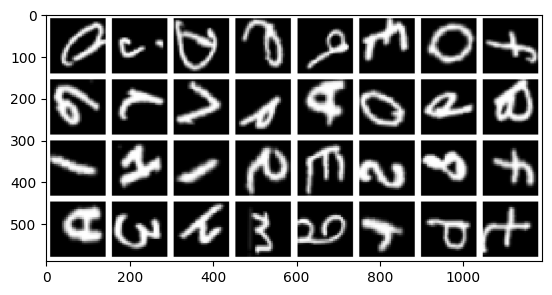

In [46]:

predict_letter("A.png")